In [0]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
# load mnist dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


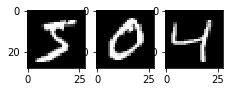

In [0]:
plt.subplot(151)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(152)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(153)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

plt.show()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
# splitting test data into test and valid dataset for better learning

from sklearn.model_selection import train_test_split

X_test, X_valid, y_test, y_valid= train_test_split(X_test, y_test, test_size=0.25)

In [0]:
X_valid.shape

(2500, 28, 28)

In [0]:
# changing shapes to 4 dimensions i.e no fo examples, shape of image and color dimension (here 1 because images rea grey scaled)

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
X_valid = X_valid / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_valid = np_utils.to_categorical(y_valid)
num_classes = y_test.shape[1]

Using TensorFlow backend.


In [0]:
y_test.shape[1]

10

In [0]:
model=tf.keras.models.Sequential([
                           tf.keras.layers.Conv2D(32, (3,3), strides=(1,1), padding="same", activation="relu", input_shape=(28, 28, 1)),
                           tf.keras.layers.MaxPooling2D(2,2),

                           tf.keras.layers.Conv2D(64, (3,3), strides=(1,1), padding="same", activation="relu"),
                           tf.keras.layers.MaxPooling2D(2,2),
                           
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(512, activation="relu"),
                           tf.keras.layers.Dense(128, activation="relu"),
                           tf.keras.layers.Dense(num_classes, activation='softmax')])

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [0]:
epochs=10
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 60000 samples, validate on 7500 samples
Epoch 1/10
60000/60000 [==============================] - 11s 179us/sample - loss: 0.1741 - accuracy: 0.9457 - val_loss: 0.0527 - val_accuracy: 0.9823
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0492 - accuracy: 0.9844 - val_loss: 0.0288 - val_accuracy: 0.9901
Epoch 3/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0272 - val_accuracy: 0.9905
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0199 - accuracy: 0.9935 - val_loss: 0.0257 - val_accuracy: 0.9919
Epoch 6/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0172 - accuracy: 0.9941 - val_loss: 0.0332 - val_accuracy: 0.9897
Epoch 7/10
60000/60000 [==============================]

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

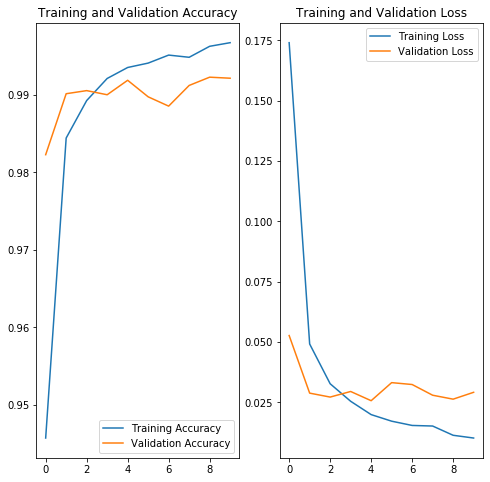

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
scores = model.evaluate(X_valid, y_valid, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.72%


In [0]:
# save model in .h5 format

model.save("model.h5")

In [0]:
# to convert model into js format we need to install tensrflowjs

! pip install tensorflowjs

     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 104.6MB 103kB/s 
     |████████████████████████████████| 256kB 66.4MB/s 
     |████████████████████████████████| 901kB 60.3MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=d4c6fc30608cbff508704dc8f22065b4f0666552dfc72624eafe1deb50cea450
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: google-colab 1.0.0 has requirement google-auth~=1.7.2, but you'll have google-auth 1.11.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.12.0, but you'll have six 1.14.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: p

In [0]:
# converting .h5 model into js format

!tensorflowjs_converter --input_format keras '/content/model.h5' '/content/model'